#### Librerías

In [1]:
# Load libraries
from scipy.stats import norm as norma
from collections import defaultdict
from matplotlib import pyplot
import seaborn as sns
import random as rnd
import pandas as pd
import numpy as np
import warnings
import time
# Librería Genética
from deap import base, creator, tools, algorithms
# Subfunciones de estimadores
from sklearn.base import clone
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/base.py][30]
from sklearn.base import is_classifier
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/base.py][535]
from sklearn.model_selection._validation import _fit_and_score
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_validation.py][346]
from sklearn.model_selection._search import BaseSearchCV
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_search.py][386]
from sklearn.model_selection._search import check_cv
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_split.py][1866]
from sklearn.model_selection._search import _check_param_grid
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/model_selection/_search.py][343]
from sklearn.metrics.scorer import check_scoring
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/scorer.py][250]
from sklearn.utils.validation import _num_samples
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/utils/validation.py][105]
from sklearn.utils.validation import indexable
# [https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/utils/validation.py][208]
from multiprocessing import Pool

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
# NonLinear Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#seed = 7
dataset = pd.read_csv("Tx_0x04.csv")
#dataset.values # Data en forma de vector (tipo array)
dataset # Data en forma de tabla

/usr/local/lib/python3.5/dist-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
/usr/lib/python3.5/importlib/_bootstrap_external.py:423: ImportWarning: Not importing directory /usr/local/lib/python3.5/dist-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


,Be07,Be08,Be09,Be10,Be11,Sector
0,-62.0,-71.0,-58.0,-75.0,-66.0,1.0
1,-60.0,-66.0,-61.0,-78.0,-66.0,1.0
2,-65.0,-74.0,-60.0,-79.0,-70.0,1.0
3,-61.0,-77.0,-60.0,-83.0,-74.0,1.0
4,-60.0,-67.0,-60.0,-78.0,-69.0,1.0
5,-66.0,-71.0,-60.0,-80.0,-66.0,1.0
6,-60.0,-63.0,-59.0,-69.0,-74.0,1.0
7,-60.0,-69.0,-61.0,-79.0,-78.0,1.0
8,-60.0,-68.0,-59.0,-70.0,-77.0,1.0
9,-65.0,-62.0,-61.0,-70.0,-78.0,1.0


#### Preparación

Dividimos el conjunto de datos y definimos el conjunto de validación en 20%

In [2]:
def prepareData(dataset, validation_size = 0.20):
	vector = dataset.values
	X = vector[:, 0:dataset.shape[1] - 1].astype(float) # Atributos
	Y = vector[:, dataset.shape[1] - 1] # Clase
    # train_test_split divide vectores o matrices aleatoriamente para el conjunto de entrenamiento y prueba
	return train_test_split(X, Y, test_size=validation_size)

x_train, x_test, y_train, y_test = prepareData(dataset, 0.15)

#### Selección

In [3]:
num_folds = 10
models = []
# append agrega un elemento al final de la estructura de datos
models.append(('DT', DecisionTreeClassifier()))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
#models

#### Evaluación

In [4]:
def evaluateModels(models, num_folds, scoring, X_train, Y_train):
	results = {}
	for name, model in models:
		kfold = KFold(n_splits=num_folds)
		cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
		results[name] = cv_results
	return pd.DataFrame(data=results)

In [5]:
# run block of code and catch warnings
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
# execute code that will generate warnings
    resultados = evaluateModels(models, 10, "accuracy", x_train, y_train)
    
#resultados

#### Comparación

In [6]:
def compareResults(results):
	new_result = pd.concat([results.mean(), results.std()], axis=1)
	new_result.columns = ["Precisión media", "Desviación Estandar"]
	sns.boxplot(data=results, orient='h')
	pyplot.xlim(xmin=0.7, xmax=1)
	pyplot.show()
	return new_result

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


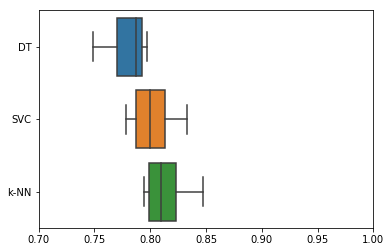

,Precisión media,Desviación Estandar
DT,0.781196,0.015881
SVC,0.801210,0.017264
k-NN,0.813509,0.018294


In [7]:
comparisonResult = compareResults(resultados)
comparisonResult

#### Validación

In [8]:
def validateModels(models, X_train, Y_train, X_validation, Y_validation):
	results = {'Modelo':[], 'Precisión':[], 'Error':[], 'cf_matrix':[] }
	for name, model in models:
		model.fit(X_train, Y_train)
		Y_predicted = model.predict(X_validation)
		results['Modelo'].append(name)
		results['cf_matrix'].append(confusion_matrix(y_pred=Y_predicted, y_true=Y_validation))
		results['Precisión'].append(accuracy_score(y_pred=Y_predicted, y_true=Y_validation))
		results['Error'].append(mean_squared_error(y_pred=Y_predicted, y_true=Y_validation))
	return pd.DataFrame(data=results)

In [9]:
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    resultTest = validateModels(models, x_train, y_train, x_test, y_test)
    resultTest.filter(items=['Modelo','Precisión','Error'])

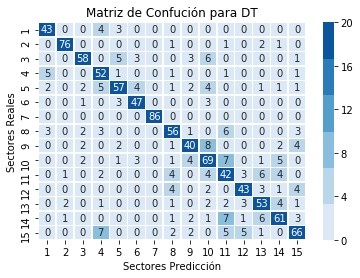

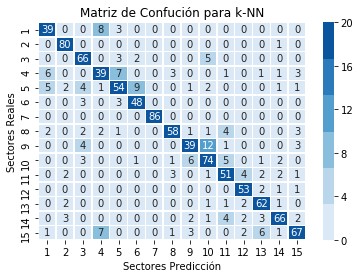

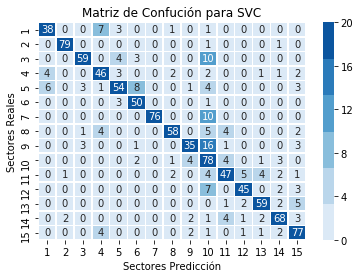

In [10]:
conf_mat = resultTest['cf_matrix']
pd.set_option('precision', 2)
# haciendo un dataframe
cfmat_df = [pd.DataFrame(conf_mat[x], 
            columns=[i+1 for i in range(15)], 
            index=[i+1 for i in range(15)]) for x in range(3)]
for i in range(3):
    sns.heatmap(cfmat_df[i], 
            cmap=sns.color_palette("Blues"), vmin=0, vmax=20,
            annot=True,linewidths=.5)
    pyplot.xlabel("Sectores Predicción")
    pyplot.ylabel("Sectores Reales")
    pyplot.title("Matriz de Confución para "+str(resultTest['Modelo'][i]))
    pyplot.show()

## Funciones Genéticas

In [11]:
def _get_param_types_maxint(params):
	params_data = list(params.items())  # name_values
	params_type = [isinstance(params[key][0], float) + 1 for key in params.keys()]  # gene_type
	params_size = [len(params[key]) - 1 for key in params.keys()]  # maxints
	return params_data, params_type, params_size


def _initIndividual(individuo, maxints):
	"""[Iniciar Individuo]
	Arguments:
		pcls {[creator.Individual]} -- [Iniciar individuo con indices aleatorios]
		maxints {[params_size]} -- [lista de máximos índices]
	Returns:
		[creator.Individual] -- [Creación de individuo]
	"""
	return individuo(rnd.randint(0, maxint) for maxint in maxints)


def _mutIndividual(individual, maxints, prob_mutacion):
	"""[Mutación Individuo]
	Arguments:
		individual {[creator.Individual]} -- [Individuo de población]
		maxints {[lista]} -- [lista de máximos índices]
		prob_mutacion {[float]} -- [probabilidad de mutación del gen]
	Returns:
		[creator.Individual] -- [Individuo mutado]
	"""
	for i in range(len(maxints)):
		if rnd.random() < prob_mutacion:
			individual[i] = rnd.randint(0, maxints[i])
	return individual,


def _cxIndividual(ind1, ind2, prob_cruce, gene_type):
	"""[Cruce de Individuos]
	Arguments:
		ind1 {[creator.Individual]} -- [Individuo 1]
		ind2 {[creator.Individual]} -- [Individuo 2]
		indpb {[float]} -- [probabilidad de emparejar]
		gene_type {[list]} -- [tipos de dato de los parámetros, CATEGORICO o NUMERICO]
	Returns:
		[creator.Individual,creator.Individual] -- [nuevos Individuos]
	"""
	CATEGORICO = 1  # int o str
	NUMERICO = 2  # float
	for i in range(len(ind1)):
		if rnd.random() < prob_cruce:
			if gene_type[i] == CATEGORICO:
				ind1[i], ind2[i] = ind2[i], ind1[i]
			else:
				sorted_ind = sorted([ind1[i], ind2[i]])
				ind1[i] = rnd.randint(sorted_ind[0], sorted_ind[1])
				ind2[i] = rnd.randint(sorted_ind[0], sorted_ind[1])
	return ind1, ind2


def _individual_to_params(individual, name_values):
	"""[Set de parámetro según individuo]
	Arguments:
		individual {[creator.Individual]} -- [individuo]
		name_values {[list]} -- [lista de parámetros, params_data]
	Returns:
		[diccionario] -- [parámetros del individuo]
	"""
	return dict((name, values[gene]) for gene, (name, values) in zip(individual, name_values))


def _evalFunction(individual, name_values, X, y, scorer, cv, uniform, fit_params,
				verbose=0, error_score='raise', score_cache={}):
	"""[Evaluación del modelo]
	Arguments:
		individual {[creator.Individual]} -- [Individuo]
		name_values {[list]} -- [parámetros en general]
		X {[array]} -- [Input]
		y {[array]} -- [Output]
		scorer {[string]} -- [Parámetro de evaluación, precisión]
		cv {[int | cross-validation]} -- [Especificación de los folds]
		uniform {[boolean]} -- [True hace que la data se distribuya uniformemente en los folds]
		fit_params {[dict | None]} -- [parámetros para estimator.fit]
	Keyword Arguments:
		verbose {integer} -- [Mensajes de descripción] (default: {0})
		error_score {numerico} -- [valor asignado si ocurre un error en fitting] (default: {'raise'})
		score_cache {dict} -- [description] (default: {{}})
	"""
	parameters = _individual_to_params(individual, name_values)
	score = 0
	n_test = 0
	paramkey = str(individual)
	if paramkey in score_cache:
		score = score_cache[paramkey]
	else:
		for train, test in cv.split(X, y):
			_score = _fit_and_score(estimator=individual.est, X=X, y=y, scorer=scorer,
						train=train, test=test, verbose=verbose,
						parameters=parameters, fit_params=fit_params,
						error_score=error_score)[0]
			if uniform:
				score += _score * len(test)
				n_test += len(test)
			else:
				score += _score
				n_test += 1
		assert n_test > 0, "No se completo el fitting, Verificar data."
		score /= float(n_test)
		score_cache[paramkey] = score
	return (score,)

#### Clase Evolutive Search

In [12]:
class EvolutiveSearchCV:
	def __init__(self, estimator, params, scoring=None, cv=4,
				refit=True, verbose=False, population_size=50,
				gene_mutation_prob=0.2, gene_crossover_prob=0.5,
				tournament_size=3, generations_number=10, gene_type=None,
				n_jobs=1, uniform=True, error_score='raise',
				fit_params={}):
		# Parámetros iniciales
		self.estimator = estimator
		self.params = params
		self.scoring = scoring
		self.cv = cv
		self.refit = refit
		self.verbose = verbose
		self.population_size = population_size
		self.gene_mutation_prob = gene_mutation_prob
		self.gene_crossover_prob = gene_crossover_prob
		self.tournament_size = tournament_size
		self.generations_number = generations_number
		self.gene_type = gene_type
		self.n_jobs = n_jobs
		self.uniform = uniform
		self.error_score = error_score
		self.fit_params = fit_params
		# Parámetros adicionales
		self._individual_evals = {}
		self.all_history_ = None
		self.all_logbooks_ = None
		self._cv_results = None
		self.best_score_ = None
		self.best_params_ = None
		self.scorer_ = None
		self.score_cache = {}
		# Fitness [base.Fitness], objetivo 1
		creator.create("FitnessMax", base.Fitness, weights=(1.0,))
		#Individuo [list], parámetros:est, FinessMax
		creator.create("Individual", list, est=clone(self.estimator), fitness=creator.FitnessMax)
	#@property
	def cv_results_(self):
		if self._cv_results is None:
			out = defaultdict(list)
			gen = self.all_history_
			# Get individuals and indexes, their list of scores,
			# and additionally the name_values for this set of parameters
			idxs, individuals, each_scores = zip(*[(idx, indiv, np.mean(indiv.fitness.values))
											for idx, indiv in list(gen.genealogy_history.items())
											if indiv.fitness.valid and not np.all(np.isnan(indiv.fitness.values))])
			name_values, _, _ = _get_param_types_maxint(self.params)
			# Add to output
			#out['param_index'] += [p] * len(idxs)
			out['index'] += idxs
			out['params'] += [_individual_to_params(indiv, name_values) for indiv in individuals]
			out['mean_test_score'] += [np.nanmean(scores)*100 for scores in each_scores]
			out['std_test_score'] += [np.nanstd(scores)*100 for scores in each_scores]
			out['min_test_score'] += [np.nanmin(scores) for scores in each_scores]
			out['max_test_score'] += [np.nanmax(scores) for scores in each_scores]
			out['nan_test_score?'] += [np.any(np.isnan(scores)) for scores in each_scores]
			self._cv_results = out
		return self._cv_results
	@property
	def best_index_(self):
		return np.argmax(self.cv_results_['max_test_score'])
	# fit y refit general
	def fit(self, X, y):
		self.best_estimator_ = None
		self.best_mem_score_ = float("-inf")
		self.best_mem_params_ = None
		_check_param_grid(self.params)
		self._fit(X, y, self.params)
		if self.refit:
			self.best_estimator_ = clone(self.estimator)
			self.best_estimator_.set_params(**self.best_mem_params_)
			if self.fit_params is not None:
				self.best_estimator_.fit(X, y, **self.fit_params)
			else:
				self.best_estimator_.fit(X, y)
	# fit individual
	def _fit(self, X, y, parameter_dict):
		self._cv_results = None  # Indicador de necesidad de actualización
		self.scorer_ = check_scoring(self.estimator, scoring=self.scoring)
		n_samples = _num_samples(X)
		# verificar longitudes x,y 
		if _num_samples(y) != n_samples:
			raise ValueError('Target [y], data [X] dont agree')
		cv = check_cv(self.cv, y=y, classifier=is_classifier(self.estimator))
		toolbox = base.Toolbox()
		# name_values = lista de parametros, gene_type = [1:categorico; 2:numérico], maxints = size(parametros)
		name_values, self.gene_type, maxints = _get_param_types_maxint(parameter_dict)
		if self.verbose:
			print("Tipos: %s, rangos: %s" % (self.gene_type, maxints))
		# registro de función Individuo
		toolbox.register("individual", _initIndividual, creator.Individual, maxints=maxints)
		# registro de función Población
		toolbox.register("population", tools.initRepeat, list, toolbox.individual)
		# Paralelísmo, create pool
		if not isinstance(self.n_jobs, int):
			self.n_jobs=1
		pool = Pool(self.n_jobs)
		toolbox.register("map", pool.map)
		# registro de función Evaluación
		toolbox.register("evaluate", _evalFunction,
						name_values=name_values, X=X, y=y,
						scorer=self.scorer_, cv=cv, uniform=self.uniform, verbose=self.verbose,
						error_score=self.error_score, fit_params=self.fit_params,
						score_cache=self.score_cache)
		# registro de función Cruce
		toolbox.register("mate", _cxIndividual, prob_cruce=self.gene_crossover_prob, gene_type=self.gene_type)
		# registro de función Mutación
		toolbox.register("mutate", _mutIndividual, prob_mutacion=self.gene_mutation_prob, maxints=maxints)
		# registro de función Selección
		toolbox.register("select", tools.selTournament, tournsize=self.tournament_size)
		# Creación de Población
		pop = toolbox.population(n=self.population_size)
		# Mejor Individuo que ha existido
		hof = tools.HallOfFame(1)
		# Stats
		stats = tools.Statistics(lambda ind: ind.fitness.values)
		stats.register("avg", np.nanmean)
		stats.register("min", np.nanmin)
		stats.register("max", np.nanmax)
		stats.register("std", np.nanstd)
		# Genealogía
		hist = tools.History()
		# Decoración de operadores de variaznza
		toolbox.decorate("mate", hist.decorator)
		toolbox.decorate("mutate", hist.decorator)
		hist.update(pop)
		# Posibles combinaciones
		if self.verbose:
			print('--- Evolve in {0} possible combinations ---'.format(np.prod(np.array(maxints) + 1)))
		pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=self.gene_crossover_prob, 
										mutpb=self.gene_mutation_prob,
										ngen=self.generations_number, stats=stats,
										halloffame=hof, verbose=self.verbose)
		#pop, logbook = algorithms.eaGenerateUpdate(toolbox,
		#								ngen=self.generations_number, stats=stats,
		#								halloffame=hof, verbose=self.verbose)
		# Save History
		self.all_history_ = hist
		self.all_logbooks_ = logbook
		# Mejor score y parametros
		current_best_score_ = hof[0].fitness.values[0]
		current_best_params_ = _individual_to_params(hof[0], name_values)
		#if self.verbose:
		#	print("Best individual is: %s\nwith fitness: %s" % (
		#		current_best_params_, current_best_score_))
		if current_best_score_ > self.best_mem_score_:
			self.best_mem_score_ = current_best_score_
			self.best_mem_params_ = current_best_params_
		# fin paralelización, close pool
		pool.close()
		pool.join()
		self.best_score_ = current_best_score_
		self.best_params_ = current_best_params_

## Análisis Comparativo

#### Selección de Estimadores

In [13]:
# Conjunto de Data
dataset = pd.read_csv("Tx_0x04.csv")
x_train, x_test, y_train, y_test = prepareData(dataset, 0.15)
# Modelos
models = { 
    'DecisionTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'kNN': KNeighborsClassifier(),
}
#estimator = 'DecisionTree'
#d = helperEvo1.grid_searchesEvo[estimator]['params']
#e = helperEvo1.grid_searchesEvo[estimator]['mean_test_score']
#display(pd.DataFrame(d))
#display(pd.DataFrame(e))
#df = helperEvo2.scoreEvo()
#display(df.drop(['.Error'], axis=1).groupby(list(df.keys()[2:])).agg([np.mean, np.std]).fillna('0'))
#display(df.drop(['.Error'], axis=1).groupby(list(df.keys()[2:]))['.Accuracy'].agg({'avg1': np.mean, 'std1':np.std}).fillna('0').sort_values(['avg1'], ascending=False))
#estimator = 'kNN'
#d = helperFinal.grid_searchesEvo[estimator]['params']

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'DecisionTree': { 
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', None],
        'min_samples_split': [2, 4, 6, 8]
    },
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [0.5, 1, 1.5, 3], 
        'degree': [2, 3, 4, 5],
        'probability': [True, False],
        'shrinking': [True, False],
        'decision_function_shape': ['ovo', 'ovr'],
        'max_iter': [300]
    },
    'kNN': { 
        'n_neighbors': list(range(1,10)),
        'weights': ['uniform', 'distance'], 
        'algorithm': ['ball_tree','kd_tree','brute'], 
        'p': [1, 2, 3, 4, 5],
        'leaf_size': list(range(15, 51, 5))
    },
}

#### Estimador de Seleccion

In [14]:
class EstimatorSelection:
	"""[Clase de Estimación Lineal]
	init: 	inicia los modelos, parámetros de entrada y 
			grid_searches, resultados que se pueden obtener con get
	fit:	Entrena los estimadores linealmente y se actualiza grid_searches
			como diccionario de resultados por modelo
	score:	Toma los resultados de todas las estimaciones y las une
			para hacer un analisis comparativo
	Fuente:	http://www.codiply.com/blog/hyperparameter-grid-search-across-multiple-models-in-scikit-learn/
	"""
	# inicio de clase
	def __init__(self, models, params):
		if not set(models.keys()).issubset(set(params.keys())):
			missing_params = list(set(models.keys()) - set(params.keys()))
			raise ValueError("Some estimators are missing parameters: %s" % missing_params)
		self.models = models
		self.params = params
		self.keys = models.keys()
		self.grid_searchesExh = {}
		self.grid_searchesRnd = {}
		self.grid_searchesEvo = {}
		self.resultExh = {}
		self.resultRnd = {}
		self.resultEvo = {}
		self.time_modelExh = {} 
		self.time_modelRnd = {} 
		self.time_modelEvo = {}
		self.cv_results = None
	# fit Exhaustivo
	def fitExh(self, X, y, cv=KFold(n_splits=5), n_jobs=1, verbose=1, scoring=None, refit=False):
		for key in self.keys:
			print("Running Exhaustive Search for %s." % key)
			model = self.models[key]
			params = self.params[key]
			start = time.time()
			gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
							verbose=verbose, scoring=scoring, refit=refit)
			self.grid_searchesExh[key] = gs.fit(X, y)
			end = time.time()
			self.time_modelExh[key] = [end-start]
	# fit Random
	def fitRnd(self, X, y, cv=KFold(n_splits=5), n_jobs=1, verbose=1, scoring=None, refit=False):
		for key in self.keys:
			print("Running Randomized Search for %s." % key)
			model = self.models[key]
			params = self.params[key]
			start = time.time()
			gs = RandomizedSearchCV(model, params, cv=cv, n_jobs=n_jobs,
							verbose=verbose, scoring=scoring, refit=refit)
			self.grid_searchesRnd[key] = gs.fit(X, y)
			end = time.time()
			self.time_modelRnd[key] = [end-start]
	# fit Evolutivo
	def fitEvo(self, X, y, cv=KFold(n_splits=5), n_jobs=1, verbose=1, scoring=None, refit=False,
			population_size=50, gene_mutation_prob=0.10, gene_crossover_prob=0.5,
			tournament_size=3, generations_number=10):
		for key in self.keys:
			print("Running Evolutive Search for %s." % key)
			model = self.models[key]
			params = self.params[key]
			start = time.time()
			gs = EvolutiveSearchCV(model, params, cv=cv, n_jobs=n_jobs,
							verbose=verbose, scoring=scoring, refit=refit, 
							population_size=population_size, 
							gene_mutation_prob=gene_mutation_prob, 
							gene_crossover_prob=gene_crossover_prob,
							tournament_size=tournament_size,
							generations_number=generations_number)
			gs.fit(X, y)
			end = time.time()
			self.grid_searchesEvo[key] = gs.cv_results_()
			#self.cv_results = gs.cv_results_()
			#print(gs.cv_results_())
			self.time_modelEvo[key] = [end-start]
	# score Exhaustivo
	def scoreExh(self):
		for estimator in self.keys:
			d = {}
			d['.Accuracy'] = self.grid_searchesExh[estimator].cv_results_['mean_test_score']*100
			d['.Error'] = self.grid_searchesExh[estimator].cv_results_['std_test_score']*100
			df1 = pd.DataFrame(d)
			d = self.grid_searchesExh[estimator].cv_results_['params']
			df2 = pd.DataFrame(list(d))
			self.resultExh[estimator] = pd.concat([df1, df2], axis=1).fillna(' ')
		return pd.concat(self.resultExh).fillna(' ')
	# score Random
	def scoreRnd(self):
		for estimator in self.keys:
			d = {}
			d['.Accuracy'] = self.grid_searchesRnd[estimator].cv_results_['mean_test_score']*100
			d['.Error'] = self.grid_searchesRnd[estimator].cv_results_['std_test_score']*100
			df1 = pd.DataFrame(d)
			d = self.grid_searchesRnd[estimator].cv_results_['params']
			df2 = pd.DataFrame(list(d))
			self.resultRnd[estimator] = pd.concat([df1, df2], axis=1).fillna(' ')
		return pd.concat(self.resultRnd).fillna(' ')
	# score Evolutivo
	def scoreEvo(self):
		for estimator in self.keys:
			d = {}
			d['.Accuracy'] = self.grid_searchesEvo[estimator]['mean_test_score']
			d['.Error'] = self.grid_searchesEvo[estimator]['std_test_score']
			df1 = pd.DataFrame(d)
			d = self.grid_searchesEvo[estimator]['params']
			df2 = pd.DataFrame(list(d))
			self.resultEvo[estimator] = pd.concat([df1, df2], axis=1).fillna(' ')
		return pd.concat(self.resultEvo).fillna(' ')

## Testing ExhaustiveSearch

### DT

In [16]:
models = { 
    'DecisionTree': DecisionTreeClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'DecisionTree': { 
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', None],
        'min_samples_split': [2, 4, 6, 8]
    }
}       
helperExh1 = EstimatorSelection(models, params)
helperExh1.fitExh(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Exhaustive Search for DecisionTree.
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 196 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed:    2.7s finished


In [17]:
print("Tiempo ejecución: "+str(helperExh1.time_modelExh['DecisionTree']))
helperExh1.scoreExh().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [2.6811270713806152]


.Accuracy  .Error class_weight criterion max_features  \
DecisionTree 40      79.10    0.46     balanced      gini                
             42      78.81    0.97     balanced      gini                
             88      78.74    0.79                   gini                
             66      78.58    1.11                entropy                
             68      78.51    0.96                entropy                
             94      78.45    0.97                   gini                
             46      78.45    1.06     balanced      gini                
             90      78.42    0.78                   gini                
             44      78.33    1.26     balanced      gini                
             64      78.33    0.96                entropy                

                 min_samples_split splitter  
DecisionTree 40                  2     best  
             42                  4     best  
             88                  2     best  
             66                  4     best  
             68                  6     best  
             94                  8     best  
             46                  8     best  
             90                  4     best  
             44                  6     best  
             64                  2     best

## SVC

In [15]:
models = { 
    'SVC': SVC(),
}
# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [0.5, 1, 1.5, 3], 
        'degree': [2, 3, 4, 5],
        'probability': [True, False],
        'shrinking': [True, False],
        'decision_function_shape': ['ovo', 'ovr'],
        'max_iter': [300]
    },
}       
helperExh2 = EstimatorSelection(models, params)
helperExh2.fitExh(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Exhaustive Search for SVC.
Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  8.0min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 19.3min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 35.8min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 55.0min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 79.0min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 108.1min
[Parallel(n_jobs=8)]: Done 2560 out of 2560 | elapsed: 114.3min finished


Running Exhaustive Search for SVC.
Fitting 5 folds for each of 512 candidates, totalling 2560 fits

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  8.3min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 19.4min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 35.6min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 54.9min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 78.9min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 107.5min
[Parallel(n_jobs=8)]: Done 2560 out of 2560 | elapsed: 113.7min finished


In [16]:
print("Tiempo ejecución: "+str(helperExh2.time_modelExh['SVC']))
helperExh2.scoreExh().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [6855.664493322372]


.Accuracy  .Error    C decision_function_shape  degree kernel  \
SVC 245       79.2     1.8  1.0                     ovr       5    rbf   
    199       79.2     1.8  1.0                     ovr       2    rbf   
    197       79.2     1.8  1.0                     ovr       2    rbf   
    244       79.2     1.8  1.0                     ovr       5    rbf   
    214       79.2     1.8  1.0                     ovr       3    rbf   
    215       79.2     1.8  1.0                     ovr       3    rbf   
    231       79.2     1.8  1.0                     ovr       4    rbf   
    230       79.2     1.8  1.0                     ovr       4    rbf   
    167       79.2     1.8  1.0                     ovo       4    rbf   
    166       79.2     1.8  1.0                     ovo       4    rbf   

         max_iter  probability  shrinking  
SVC 245       300         True      False  
    199       300        False      False  
    197       300         True      False  
    244       300         True       True  
    214       300        False       True  
    215       300        False      False  
    231       300        False      False  
    230       300        False       True  
    167       300        False      False  
    166       300        False       True

## k-NN

In [18]:
models = { 
    'kNN': KNeighborsClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'kNN': { 
        'n_neighbors': list(range(1,11)),
        'weights': ['uniform', 'distance'], 
        'algorithm': ['ball_tree','kd_tree','brute'], 
        'p': [1, 2, 3, 4, 5],
        'leaf_size': list(range(10, 51, 5))
    }
}       
helperExh3 = EstimatorSelection(models, params)
helperExh3.fitExh(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Exhaustive Search for kNN.
Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   34.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 10.0min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 18.1min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed: 29.8min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed: 45.6min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed: 64.4min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed: 86.5min
[Parallel(n_jobs=8)]: Done 4034 tasks      | elapsed: 115.2min
[Parallel(n_jobs=8)]: Done 4984 tasks      | elapsed: 132.6min
[Parallel(n_jobs=8)]: Done 6034 tasks      | elapsed: 136.2min
[Parallel(n_jobs=8)]: Done 7184 tasks      | elapsed: 140.4min
[Parallel(n_jobs=8)]: Done 8434 tasks      | elapsed: 146.3min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed: 176.2min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed: 

In [19]:
print("Tiempo ejecución: "+str(helperExh3.time_modelExh['kNN']))
helperExh3.scoreExh().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [18353.91120481491]


.Accuracy  .Error  algorithm  leaf_size  n_neighbors  p   weights
kNN 161      84.83    1.02  ball_tree         15            7  1  distance
    61       84.83    1.02  ball_tree         10            7  1  distance
    561      84.71    1.02  ball_tree         35            7  1  distance
    461      84.71    1.02  ball_tree         30            7  1  distance
    361      84.71    1.02  ball_tree         25            7  1  distance
    261      84.71    1.02  ball_tree         20            7  1  distance
    751      84.70    1.12  ball_tree         45            6  1  distance
    851      84.70    1.12  ball_tree         50            6  1  distance
    651      84.70    1.12  ball_tree         40            6  1  distance
    661      84.66    1.10  ball_tree         40            7  1  distance

## Testing RandomizedSearch

### DT

In [35]:
models = { 
    'DecisionTree': DecisionTreeClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'DecisionTree': { 
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', None],
        'min_samples_split': [2, 4, 6, 8]
    }
}       
helperRnd1 = EstimatorSelection(models, params)
helperRnd1.fitRnd(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Randomized Search for DecisionTree.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.5s finished


In [36]:
print("Tiempo ejecución: "+str(helperRnd1.time_modelRnd['DecisionTree']))
helperRnd1.scoreRnd().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [0.5133950710296631]


.Accuracy  .Error class_weight criterion max_features  \
DecisionTree 6      77.66    0.88                   gini         sqrt   
             5      77.53    0.85                entropy                
             1      77.17    1.40     balanced      gini                
             9      76.74    0.49     balanced   entropy                
             7      76.28    0.99     balanced      gini         log2   
             3      76.12    0.74     balanced      gini         log2   
             8      75.68    0.81     balanced      gini         sqrt   
             2      75.32    0.96                   gini                
             0      70.21    1.20                   gini         log2   
             4      70.03    1.73     balanced      gini         log2   

                min_samples_split splitter  
DecisionTree 6                  2     best  
             5                  4     best  
             1                  8     best  
             9                  6     best  
             7                  6     best  
             3                  4     best  
             8                  6     best  
             2                  6   random  
             0                  6   random  
             4                  4   random

### SVC

In [63]:
models = { 
    'SVC': SVC(),
}
# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [0.5, 1, 1.5, 3], 
        'degree': [2, 3, 4, 5],
        'probability': [True, False],
        'shrinking': [True, False],
        'decision_function_shape': ['ovo', 'ovr'],
        'max_iter': [300]
    },
}       
helperRnd2 = EstimatorSelection(models, params)
helperRnd2.fitRnd(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Randomized Search for SVC.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   53.7s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  1.4min finished


In [64]:
print("Tiempo ejecución: "+str(helperRnd2.time_modelRnd['SVC']))
helperRnd2.scoreRnd().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [85.41693353652954]


.Accuracy  .Error    C decision_function_shape  degree   kernel  \
SVC 3      78.60    1.69  1.5                     ovr       5      rbf   
    5      78.55    1.59  1.0                     ovr       5      rbf   
    2      78.12    1.64  3.0                     ovr       2      rbf   
    7      72.04    1.62  0.5                     ovo       4      rbf   
    9      72.04    1.62  0.5                     ovo       5      rbf   
    6      51.16    1.53  0.5                     ovr       5   linear   
    8      44.38    3.37  1.0                     ovr       3   linear   
    4      40.15    2.70  0.5                     ovo       4     poly   
    0       7.84    0.47  0.5                     ovr       5  sigmoid   
    1       7.84    0.47  1.5                     ovo       3  sigmoid   

       max_iter  probability  shrinking  
SVC 3       300        False       True  
    5       300        False      False  
    2       300         True       True  
    7       300        False      False  
    9       300         True      False  
    6       300         True      False  
    8       300         True       True  
    4       300         True       True  
    0       300        False      False  
    1       300        False      False

### k-NN

In [39]:
models = { 
    'kNN': KNeighborsClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'kNN': { 
        'n_neighbors': list(range(1,11)),
        'weights': ['uniform', 'distance'], 
        'algorithm': ['ball_tree','kd_tree','brute'], 
        'p': [1, 2, 3, 4, 5],
        'leaf_size': list(range(10, 51, 5))
    }
}  
helperRnd3 = EstimatorSelection(models, params)
helperRnd3.fitRnd(x_train, y_train, scoring='accuracy', n_jobs=8)

Running Randomized Search for kNN.
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:   39.3s finished


In [40]:
print("Tiempo ejecución: "+str(helperRnd3.time_modelRnd['kNN']))
helperRnd3.scoreRnd().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [39.31176447868347]


.Accuracy  .Error  algorithm  leaf_size  n_neighbors  p   weights
kNN 3      83.88    1.14  ball_tree         15            5  1  distance
    1      81.94    0.79  ball_tree         50           10  1   uniform
    8      80.96    1.35    kd_tree         45            5  3  distance
    7      80.91    1.15    kd_tree         15            2  2  distance
    9      80.63    1.62    kd_tree         40            3  3  distance
    6      80.50    1.64    kd_tree         45            3  5  distance
    5      80.35    1.41  ball_tree         30            1  3  distance
    4      80.32    1.55      brute         15            7  3  distance
    2      79.69    1.39    kd_tree         45            3  5   uniform
    0      78.40    1.40    kd_tree         30            8  3   uniform

## Testing EvolutiveSearch

### DT

In [108]:
models = { 
    'DecisionTree': DecisionTreeClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'DecisionTree': { 
        'criterion': ['entropy', 'gini'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': ['balanced', None],
        'min_samples_split': [2, 4, 6, 8]
    }
}       
helperEvo1 = EstimatorSelection(models, params)
helperEvo1.fitEvo(x_train, y_train, scoring='accuracy', n_jobs=8, population_size=10, generations_number=9)

Running Evolutive Search for DecisionTree.
Tipos: [1, 1, 1, 1, 1], rangos: [2, 1, 1, 1, 3]


/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


--- Evolve in 96 possible combinations ---
gen	nevals	avg     	min     	max     	std      
0  	10    	0.756323	0.704281	0.776775	0.0194008
1  	6     	0.76003 	0.713794	0.776775	0.0167539
2  	7     	0.76577 	0.759062	0.776775	0.00631424
3  	6     	0.766689	0.761686	0.776775	0.00441822
4  	4     	0.768132	0.761686	0.776775	0.00370329
5  	7     	0.76905 	0.753485	0.776775	0.006051  
6  	4     	0.772101	0.767427	0.776775	0.00348566
7  	6     	0.771839	0.763162	0.776775	0.0047431 
8  	10    	0.765524	0.763162	0.772675	0.00345539
9  	7     	0.768361	0.763162	0.772675	0.00347623


In [109]:
print("Tiempo ejecución: "+str(helperEvo1.time_modelEvo['DecisionTree']))
helperEvo1.scoreEvo().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [1.678194284439087]


.Accuracy  .Error class_weight criterion max_features  \
DecisionTree 20      77.68     0.0                entropy         sqrt   
             46      77.68     0.0                entropy         sqrt   
             24      77.68     0.0                entropy         sqrt   
             29      77.68     0.0                entropy         sqrt   
             18      77.68     0.0                entropy         sqrt   
             41      77.68     0.0                entropy         sqrt   
             16      77.68     0.0                entropy         sqrt   
             15      77.68     0.0                entropy         sqrt   
             14      77.68     0.0                entropy         sqrt   
             13      77.68     0.0                entropy         sqrt   

                 min_samples_split splitter  
DecisionTree 20                  2     best  
             46                  2     best  
             24                  8     best  
             29                  2     best  
             18                  2     best  
             41                  2     best  
             16                  2     best  
             15                  2     best  
             14                  2     best  
             13                  2     best

### SVC

In [21]:
models = { 
    'SVC': SVC(),
}
# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'SVC': {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'C': [0.5, 1, 1.5, 3], 
        'degree': [2, 3, 4, 5],
        'probability': [True, False],
        'shrinking': [True, False],
        'decision_function_shape': ['ovo', 'ovr'],
        'max_iter': [300]
    },
}
with warnings.catch_warnings():
# ignore all caught warnings
    warnings.filterwarnings("ignore")
    helperEvo2 = EstimatorSelection(models, params)
    helperEvo2.fitEvo(x_train, y_train, scoring='accuracy', n_jobs=8, population_size=20, generations_number=10)

Running Evolutive Search for SVC.
Tipos: [1, 1, 1, 2, 1, 1, 1], rangos: [1, 1, 0, 3, 3, 3, 1]
--- Evolve in 512 possible combinations ---
gen	nevals	avg    	min      	max     	std     
0  	20    	0.35533	0.0779072	0.795637	0.213676
1  	12    	0.617722	0.396424 	0.795637	0.176612
2  	12    	0.726513	0.421847 	0.795637	0.135535
3  	11    	0.79535 	0.791045 	0.795637	0.00101884
4  	13    	0.795637	0.795637 	0.795637	0         
5  	16    	0.795637	0.795637 	0.795637	0         
6  	14    	0.795637	0.795637 	0.795637	0         
7  	12    	0.795637	0.795637 	0.795637	0         
8  	17    	0.795637	0.795637 	0.795637	0         
9  	15    	0.795637	0.795637 	0.795637	0         
10 	6     	0.795637	0.795637 	0.795637	0         


In [61]:
print("Tiempo ejecución: "+str(helperEvo2.time_modelEvo['SVC']))
helperEvo2.scoreEvo().sort_values(['.Accuracy'], ascending=False).head(10)

Tiempo ejecución: [2362.6577773094177]


.Accuracy  .Error    C decision_function_shape  degree kernel  \
SVC 59       78.6     0.0  1.5                     ovr       2    rbf   
    75       78.6     0.0  1.5                     ovr       2    rbf   
    87       78.6     0.0  1.5                     ovo       2    rbf   
    86       78.6     0.0  1.5                     ovr       2    rbf   
    85       78.6     0.0  1.5                     ovr       2    rbf   
    84       78.6     0.0  1.5                     ovo       2    rbf   
    83       78.6     0.0  1.5                     ovr       2    rbf   
    82       78.6     0.0  1.5                     ovr       2    rbf   
    81       78.6     0.0  1.5                     ovr       2    rbf   
    80       78.6     0.0  1.5                     ovo       2    rbf   

        max_iter  probability  shrinking  
SVC 59       300         True       True  
    75       300         True       True  
    87       300         True      False  
    86       300         True      False  
    85       300        False      False  
    84       300         True      False  
    83       300         True       True  
    82       300         True      False  
    81       300         True      False  
    80       300         True      False

### k-NN

In [20]:
models = { 
    'kNN': KNeighborsClassifier(),
}

# Parametros de los modelos para el Test 
# DT:2*2*3*2*4=96     svc:4*4*4*2*2*2=512      knn:10*2*3*5*9=2700
params = {
    'kNN': { 
        'n_neighbors': list(range(1,11)),
        'weights': ['uniform', 'distance'], 
        'algorithm': ['ball_tree','kd_tree','brute'], 
        'p': [1, 2, 3, 4, 5],
        'leaf_size': list(range(10, 51, 5))
    }
}
helperEvo3 = EstimatorSelection(models, params)
helperEvo3.fitEvo(x_train, y_train, scoring='accuracy', n_jobs=8, population_size=25, generations_number=12)

Running Evolutive Search for kNN.
Tipos: [1, 1, 1, 1, 1], rangos: [4, 1, 9, 8, 2]
--- Evolve in 2700 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	25    	0.809808	0.786616	0.829916	0.010651
1  	16    	0.816874	0.791537	0.845826	0.0116931
2  	8     	0.824405	0.80187 	0.845826	0.0104982
3  	13    	0.832744	0.807282	0.846974	0.0108823
4  	19    	0.840499	0.829916	0.84599 	0.0068454
5  	18    	0.84515 	0.831064	0.84599 	0.00288865
6  	12    	0.845819	0.84435 	0.84599 	0.000309394
7  	19    	0.845924	0.845826	0.84599 	8.03507e-05
8  	14    	0.845983	0.845826	0.84599 	3.21403e-05
9  	13    	0.84599 	0.84599 	0.84599 	0          
10 	16    	0.84599 	0.84599 	0.84599 	0          
11 	13    	0.844113	0.799082	0.84599 	0.00919212 
12 	13    	0.845393	0.831064	0.84599 	0.00292476 


In [18]:
print("Tiempo ejecución: "+str(helperEvo3.time_modelEvo['kNN']))
kNN_evol=helperEvo3.scoreEvo().sort_values(['.Accuracy'], ascending=False).head(10)
kNN_evol

Tiempo ejecución: [149.47025775909424]


.Accuracy  .Error algorithm  leaf_size  n_neighbors  p   weights
kNN 87       84.39     0.0     brute         30            7  1  distance
    120      84.39     0.0     brute         45            7  1  distance
    112      84.39     0.0     brute         45            7  1  distance
    113      84.39     0.0     brute         45            7  1  distance
    114      84.39     0.0     brute         30            7  1  distance
    115      84.39     0.0     brute         45            7  1  distance
    116      84.39     0.0     brute         15            7  1  distance
    117      84.39     0.0     brute         15            7  1  distance
    118      84.39     0.0     brute         30            7  1  distance
    119      84.39     0.0     brute         30            7  1  distance

## Comparación

### DT

In [29]:
DT_Ex = pd.read_csv("DT_Ex.csv")
DT_Rand = pd.read_csv("DT_Rand.csv")
DT_Evol = pd.read_csv("DT_Evol.csv")

DT_RAM_PERC = pd.read_csv("DT_RAM_PERC.csv")
DT_Cycles = pd.read_csv("DT_CYCLES.csv")

DT_CPU = DT_Ex[['CPU(J)']]
DT_CPU['Exhaustivo'] = DT_CPU
DT_CPU['Aleatorio'] = DT_Rand['CPU(J)']
DT_CPU['Evolutivo'] = DT_Evol['CPU(J)']
DT_CPU.to_csv('DT_CPU_out.csv', index=False)
DT_CPU_ALL = pd.read_csv("DT_CPU_out.csv")

DT_RAM = DT_Ex[['RAM(J)']]
DT_RAM['Exhaustivo'] = DT_RAM
DT_RAM['Aleatorio'] = DT_Rand['RAM(J)']
DT_RAM['Evolutivo'] = DT_Evol['RAM(J)']
DT_RAM.to_csv('DT_RAM_out.csv', index=False)
DT_RAM_ALL = pd.read_csv("DT_RAM_out.csv")

DT_PERC_CPU = DT_Ex[['%CPU']]
DT_PERC_CPU['Exhaustivo'] = DT_PERC_CPU
DT_PERC_CPU['Aleatorio'] = DT_Rand['%CPU']
DT_PERC_CPU['Evolutivo'] = DT_Evol['%CPU']
DT_PERC_CPU.to_csv('DT_PERC_CPU_out.csv', index=False)
DT_PERC_CPU_ALL = pd.read_csv("DT_PERC_CPU_out.csv")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

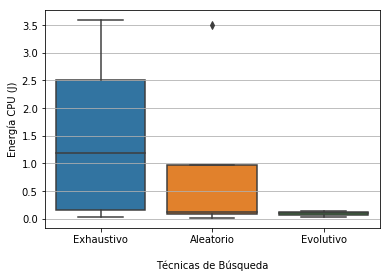

In [5]:
g = sns.boxplot(data=DT_CPU_ALL.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

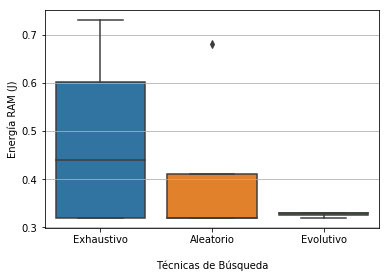

In [6]:
g = sns.boxplot(data=DT_RAM_ALL.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

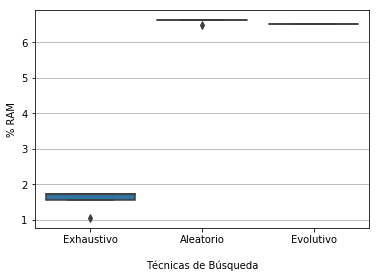

In [30]:
g = sns.boxplot(data=DT_RAM_PERC.iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

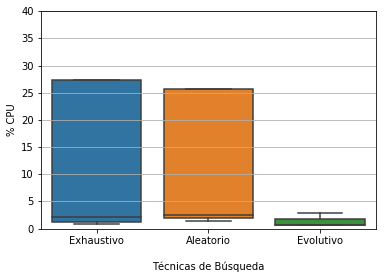

In [9]:
g = sns.boxplot(data=DT_PERC_CPU_ALL.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nTécnicas de Búsqueda')
g.set(ylim=(0, 40))
#g.set(ylim=(0, 80))
g.yaxis.grid(True)

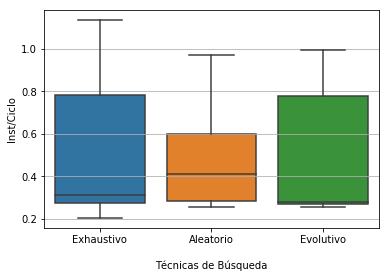

In [11]:
g = sns.boxplot(data=DT_Cycles .iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

### Consumo total

In [24]:
pd.read_csv("energy_DT.csv")

,Método,CPU(J),RAM(J),Tiempo(s)
0,Exhaustivo,11.69,6.24,5.01
1,Aleatorio,11.26,4.39,3.00
2,Evolutivo,1.81,3.14,3.00


### SVC

In [31]:
SVC_Ex = pd.read_csv("SVC_Ex.csv")
SVC_Rand = pd.read_csv("SVC_Rand.csv")
SVC_Evol = pd.read_csv("SVC_Evol.csv")

SVC_RAM_PERC = pd.read_csv("SVM_RAM_PERC.csv")
SVC_Cycless = pd.read_csv("SVM_CYCLES.csv")

SVC_CPU = SVC_Ex[['CPU(J)']]
SVC_CPU['Exhaustivo'] = SVC_CPU
SVC_CPU['Aleatorio'] = SVC_Rand['CPU(J)']
SVC_CPU['Evolutivo'] = SVC_Evol['CPU(J)']
SVC_CPU.to_csv('SVC_CPU_out.csv', index=False)
SVC_CPU_ALL = pd.read_csv("SVC_CPU_out.csv")

SVC_RAM = SVC_Ex[['RAM(J)']]
SVC_RAM['Exhaustivo'] = SVC_RAM
SVC_RAM['Aleatorio'] = SVC_Rand['RAM(J)']
SVC_RAM['Evolutivo'] = SVC_Evol['RAM(J)']
SVC_RAM.to_csv('SVC_RAM_out.csv', index=False)
SVC_RAM_ALL = pd.read_csv("SVC_RAM_out.csv")

SVC_PERC_CPU = SVC_Ex[['%CPU']]
SVC_PERC_CPU['Exhaustivo'] = SVC_PERC_CPU
SVC_PERC_CPU['Aleatorio'] = SVC_Rand['%CPU']
SVC_PERC_CPU['Evolutivo'] = SVC_Evol['%CPU']
SVC_PERC_CPU.to_csv('SVC_PERC_CPU_out.csv', index=False)
SVC_PERC_CPU_ALL = pd.read_csv("SVC_PERC_CPU_out.csv")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

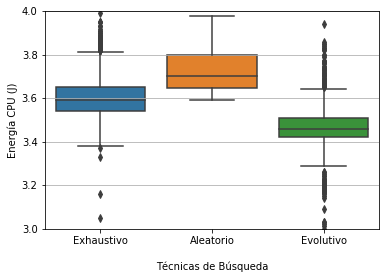

In [14]:
g = sns.boxplot(data=SVC_CPU_ALL.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nTécnicas de Búsqueda')
g.set(ylim=(3, 4))
g.yaxis.grid(True)

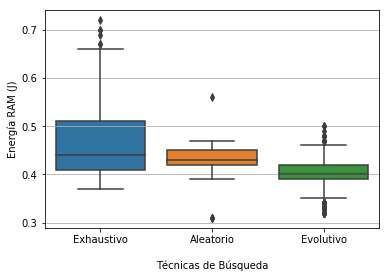

In [15]:
g = sns.boxplot(data=SVC_RAM_ALL.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nTécnicas de Búsqueda')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

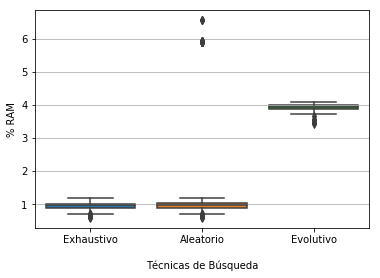

In [32]:
g = sns.boxplot(data=SVC_Ex_RAM.iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

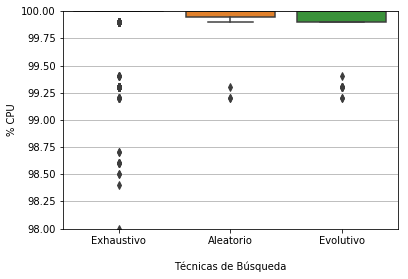

In [19]:
g = sns.boxplot(data=SVC_PERC_CPU_ALL.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nTécnicas de Búsqueda')
g.set(ylim=(98, 100))
g.yaxis.grid(True)

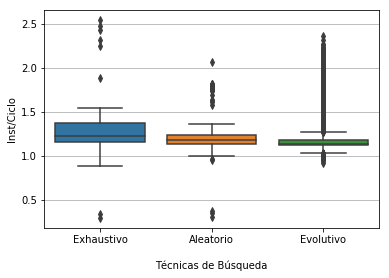

In [21]:
g = sns.boxplot(data=SVC_Cycles .iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

### Consumo total

In [4]:
pd.read_csv("energy_SVC.csv")

,Método,CPU(J),RAM(J),Tiempo(s)
0,Exhaustivo,30692.37,3670.43,2870.0
1,Aleatorio,643.82,79.24,60.0
2,Evolutivo,14951.87,1788.73,1900.0


### k-NN

In [34]:
kNN_Ex = pd.read_csv("kNN_Ex.csv")
kNN_Rand = pd.read_csv("kNN_Rand.csv")
kNN_Evol = pd.read_csv("kNN_Evol.csv")

kNN_RAM_PERC = pd.read_csv("kNN_RAM_PERC.csv")
kNN_Cycles = pd.read_csv("kNN_CYCLES.csv")

kNN_CPU = kNN_Ex[['CPU(J)']]
kNN_CPU['Exhaustivo'] = kNN_CPU
kNN_CPU['Aleatorio'] = kNN_Rand['CPU(J)']
kNN_CPU['Evolutivo'] = kNN_Evol['CPU(J)']
kNN_CPU.to_csv('kNN_CPU_out.csv', index=False)
kNN_CPU_ALL = pd.read_csv("kNN_CPU_out.csv")

kNN_RAM = kNN_Ex[['RAM(J)']]
kNN_RAM['Exhaustivo'] = kNN_RAM
kNN_RAM['Aleatorio'] = kNN_Rand['RAM(J)']
kNN_RAM['Evolutivo'] = kNN_Evol['RAM(J)']
kNN_RAM.to_csv('kNN_RAM_out.csv', index=False)
kNN_RAM_ALL = pd.read_csv("kNN_RAM_out.csv")

kNN_PERC_CPU = kNN_Ex[['%CPU']]
kNN_PERC_CPU['Exhaustivo'] = kNN_PERC_CPU
kNN_PERC_CPU['Aleatorio'] = kNN_Rand['%CPU']
kNN_PERC_CPU['Evolutivo'] = kNN_Evol['%CPU']
kNN_PERC_CPU.to_csv('kNN_PERC_CPU_out.csv', index=False)
kNN_PERC_CPU_ALL = pd.read_csv("kNN_PERC_CPU_out.csv")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

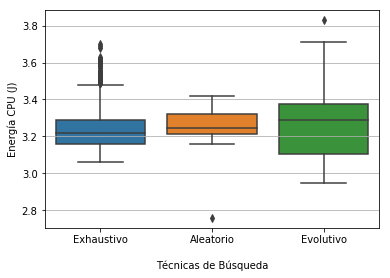

In [35]:
g = sns.boxplot(data=kNN_CPU_ALL.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nTécnicas de Búsqueda')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

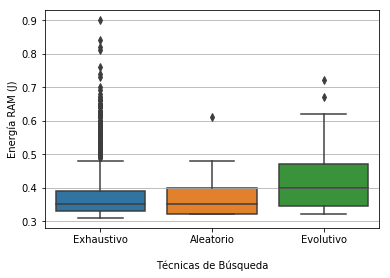

In [36]:
g = sns.boxplot(data=kNN_RAM_ALL.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nTécnicas de Búsqueda')
#g.set(ylim=(0.3, 0.6))
g.yaxis.grid(True)

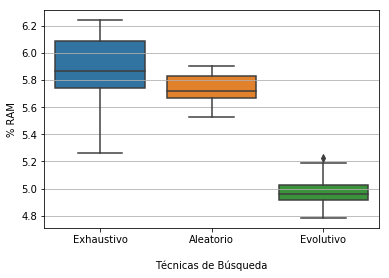

In [37]:
g = sns.boxplot(data=kNN_RAM_PERC.iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

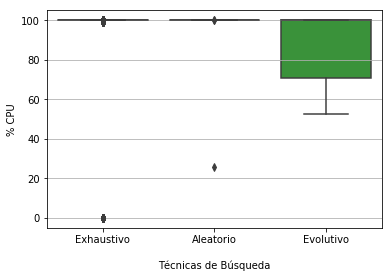

In [38]:
g = sns.boxplot(data=kNN_PERC_CPU_ALL.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nTécnicas de Búsqueda')
#g.set(ylim=(70, 100))
g.yaxis.grid(True)

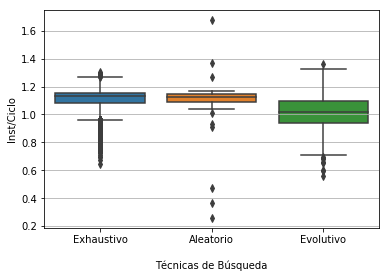

In [39]:
g = sns.boxplot(data=kNN_Cycles .iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nTécnicas de Búsqueda')
g.yaxis.grid(True)

### Consumo total

In [5]:
pd.read_csv("energy_kNN.csv")

,Método,CPU(J),RAM(J),Tiempo(s)
0,Exhaustivo,46882.58,5391.45,4840.0
1,Aleatorio,227.30,25.46,24.0
2,Evolutivo,1244.65,148.98,140.0


## COMPARACIÓN ALGORITMOS vs METAHEURISTICA

In [79]:
EXH_CYCLES = pd.read_csv("EXH_CYCLES.csv")
RAND_CYCLES = pd.read_csv("RAND_CYCLES.csv")
EVOL_CYCLES = pd.read_csv("EVOL_CYCLES.csv")

### Exhaustivo

In [48]:
EX_CPU = kNN_Ex[['CPU(J)']]
EX_CPU['k-NN'] = kNN_Ex['CPU(J)']
EX_CPU['SVM'] = SVC_Ex['CPU(J)']
EX_CPU['DT'] = DT_Ex['CPU(J)']
EX_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CPU(J),k-NN,SVM,DT
0,3.34,3.34,3.62,3.59
1,3.40,3.40,3.55,2.15
2,3.28,3.28,3.69,0.04
3,3.31,3.31,3.69,0.21
4,3.37,3.37,3.59,NaN
5,3.42,3.42,3.51,NaN
6,3.24,3.24,3.50,NaN
7,3.33,3.33,3.44,NaN
8,3.31,3.31,3.50,NaN
9,3.29,3.29,3.48,NaN


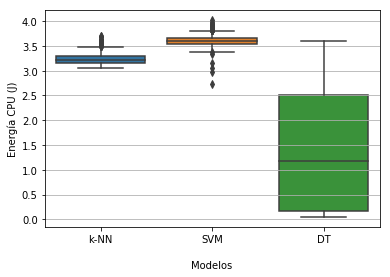

In [49]:
g = sns.boxplot(data=EX_CPU.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [50]:
EX_RAM = kNN_Ex[['RAM(J)']]
EX_RAM['k-NN'] = kNN_Ex['RAM(J)']
EX_RAM['SVM'] = SVC_Ex['RAM(J)']
EX_RAM['DT'] = DT_Ex['RAM(J)']
EX_RAM

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RAM(J),k-NN,SVM,DT
0,0.32,0.32,0.56,0.56
1,0.34,0.34,0.48,0.73
2,0.35,0.35,0.46,0.32
3,0.34,0.34,0.47,0.32
4,0.37,0.37,0.54,NaN
5,0.35,0.35,0.51,NaN
6,0.34,0.34,0.56,NaN
7,0.32,0.32,0.56,NaN
8,0.39,0.39,0.59,NaN
9,0.33,0.33,0.58,NaN


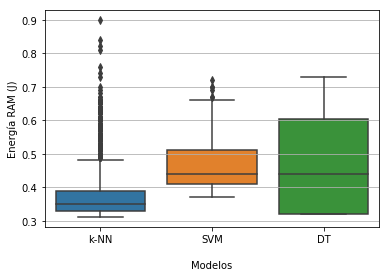

In [51]:
g = sns.boxplot(data=EX_RAM.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [52]:
EX_PERC_CPU = kNN_Ex[['%CPU']]
EX_PERC_CPU['k-NN'] = kNN_Ex['%CPU']
EX_PERC_CPU['SVM'] = SVC_Ex['%CPU']
EX_PERC_CPU['DT'] = DT_Ex['%CPU']
EX_PERC_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,%CPU,k-NN,SVM,DT
0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,3.0
2,100.0,100.0,100.0,1.4
3,100.0,100.0,99.9,0.8
4,100.0,100.0,99.3,NaN
5,100.0,100.0,100.0,NaN
6,100.0,100.0,100.0,NaN
7,100.0,100.0,100.0,NaN
8,100.0,100.0,100.0,NaN
9,0.0,0.0,100.1,NaN


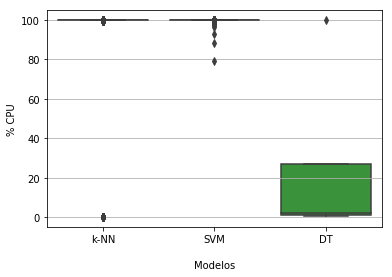

In [53]:
g = sns.boxplot(data=EX_PERC_CPU.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [46]:
EXH_RAM_PERC = pd.read_csv("EXH_RAM_PERC.csv")

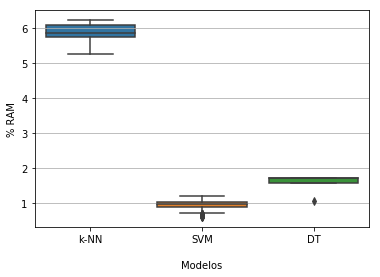

In [47]:
g = sns.boxplot(data=EXH_RAM_PERC .iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nModelos')
g.yaxis.grid(True)

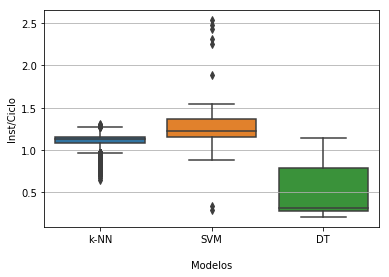

In [51]:
g = sns.boxplot(data=EXH_CYCLES.iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

### Random

In [61]:
RAND_CPU = SVC_Rand[['CPU(J)']]
RAND_CPU['SVM'] = SVC_Rand['CPU(J)']
RAND_CPU['k-NN'] = kNN_Rand['CPU(J)']
RAND_CPU['DT'] = DT_Rand['CPU(J)']
RAND_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CPU(J),SVM,k-NN,DT
0,3.70,3.70,3.42,0.12
1,3.65,3.65,3.21,0.02
2,3.70,3.70,3.16,3.50
3,3.82,3.82,3.21,0.11
4,3.67,3.67,3.24,0.02
5,3.66,3.66,3.28,NaN
6,3.65,3.65,3.32,NaN
7,3.73,3.73,3.23,NaN
8,3.70,3.70,3.32,NaN
9,3.72,3.72,3.33,NaN


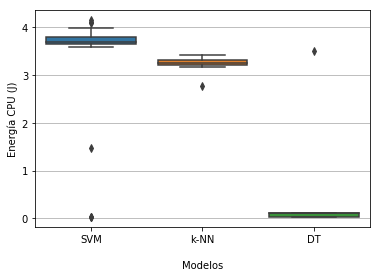

In [55]:
g = sns.boxplot(data=RAND_CPU.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [62]:
RAND_RAM = SVC_Rand[['RAM(J)']]
RAND_RAM['SVM'] = SVC_Rand['RAM(J)']
RAND_RAM['k-NN'] = kNN_Rand['RAM(J)']
RAND_RAM['DT'] = DT_Rand['RAM(J)']
RAND_RAM

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RAM(J),SVM,k-NN,DT
0,0.46,0.46,0.61,0.32
1,0.42,0.42,0.32,0.32
2,0.43,0.43,0.32,0.68
3,0.44,0.44,0.32,0.32
4,0.42,0.42,0.33,0.32
5,0.42,0.42,0.40,NaN
6,0.44,0.44,0.40,NaN
7,0.43,0.43,0.32,NaN
8,0.43,0.43,0.36,NaN
9,0.45,0.45,0.48,NaN


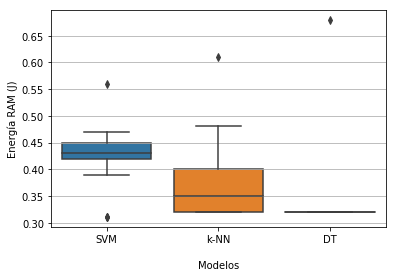

In [57]:
g = sns.boxplot(data=RAND_RAM.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [65]:
RAND_RAM_PERC = pd.read_csv("RAND_RAM_PERC.csv")

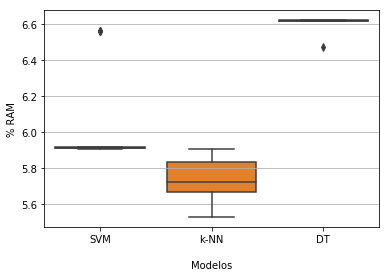

In [66]:
g = sns.boxplot(data=RAND_RAM_PERC .iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nModelos')
g.yaxis.grid(True)

In [67]:
RAND_PERC_CPU = SVC_Rand[['%CPU']]
RAND_PERC_CPU['SVM'] = SVC_Rand['%CPU']
RAND_PERC_CPU['k-NN'] = kNN_Rand['%CPU']
RAND_PERC_CPU['DT'] = DT_Rand['%CPU']
RAND_PERC_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,%CPU,SVM,k-NN,DT
0,100.0,100.0,100.0,2.1
1,100.0,100.0,99.9,2.8
2,100.0,100.0,100.0,94.3
3,100.0,100.0,100.0,1.4
4,100.0,100.0,100.0,0.7
5,100.0,100.0,100.0,NaN
6,100.0,100.0,100.0,NaN
7,100.0,100.0,100.0,NaN
8,100.0,100.0,100.0,NaN
9,100.0,100.0,100.1,NaN


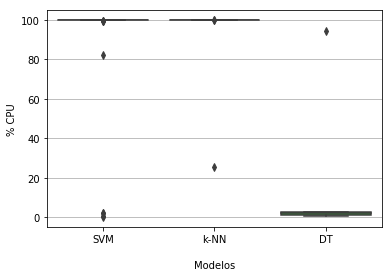

In [59]:
g = sns.boxplot(data=RAND_PERC_CPU.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nModelos')
g.yaxis.grid(True)

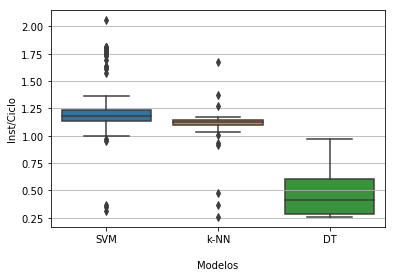

In [63]:
g = sns.boxplot(data=RAND_CYCLES.iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

### Evolutivo

In [68]:
EVOL_CPU = SVC_Evol[['CPU(J)']]
EVOL_CPU['SVM'] = SVC_Evol[['CPU(J)']]
EVOL_CPU['k-NN'] = kNN_Evol[['CPU(J)']]
EVOL_CPU['DT'] = DT_Evol[['CPU(J)']]
EVOL_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CPU(J),SVM,k-NN,DT
0,3.76,3.76,3.23,0.14
1,3.69,3.69,3.26,0.03
2,3.79,3.79,3.30,0.10
3,3.86,3.86,3.31,NaN
4,3.82,3.82,3.30,NaN
5,3.71,3.71,3.20,NaN
6,3.83,3.83,3.25,NaN
7,3.66,3.66,3.23,NaN
8,3.82,3.82,3.30,NaN
9,3.71,3.71,3.26,NaN


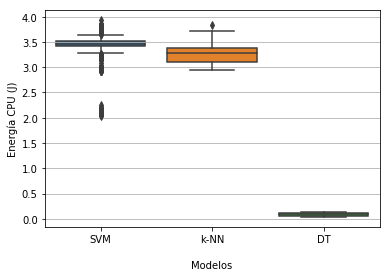

In [69]:
g = sns.boxplot(data=EVOL_CPU.iloc[:,1:4])
g.set(ylabel='Energía CPU (J)', xlabel='\nModelos')
#g.set(ylim=(0, 5))
g.yaxis.grid(True)

In [70]:
EVOL_RAM = SVC_Evol[['RAM(J)']]
EVOL_RAM['SVM'] = SVC_Rand['RAM(J)']
EVOL_RAM['k-NN'] = kNN_Rand['RAM(J)']
EVOL_RAM['DT'] = DT_Rand['RAM(J)']
EVOL_RAM

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RAM(J),SVM,k-NN,DT
0,0.48,0.46,0.61,0.32
1,0.47,0.42,0.32,0.32
2,0.44,0.43,0.32,0.68
3,0.44,0.44,0.32,0.32
4,0.47,0.42,0.33,0.32
5,0.43,0.42,0.40,NaN
6,0.43,0.44,0.40,NaN
7,0.42,0.43,0.32,NaN
8,0.45,0.43,0.36,NaN
9,0.42,0.45,0.48,NaN


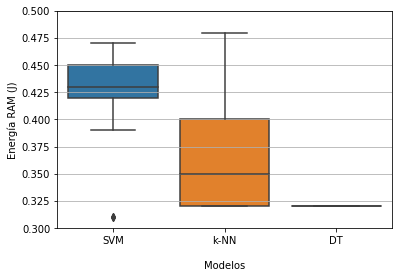

In [71]:
g = sns.boxplot(data=EVOL_RAM.iloc[:,1:4])
g.set(ylabel='Energía RAM (J)', xlabel='\nModelos')
g.set(ylim=(0.3, 0.5))
g.yaxis.grid(True)

In [72]:
EVOL_PERC_CPU = SVC_Evol[['%CPU']]
EVOL_PERC_CPU['SVM'] = SVC_Evol['%CPU']
EVOL_PERC_CPU['k-NN'] = kNN_Evol['%CPU']
EVOL_PERC_CPU['DT'] = DT_Evol['%CPU']
EVOL_PERC_CPU

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,%CPU,SVM,k-NN,DT
0,100.0,100.0,100.0,0.7
1,100.0,100.0,100.0,0.7
2,100.0,100.0,100.0,2.9
3,0.0,0.0,100.0,NaN
4,100.0,100.0,100.0,NaN
5,100.0,100.0,100.0,NaN
6,100.0,100.0,100.0,NaN
7,100.0,100.0,100.1,NaN
8,100.0,100.0,100.0,NaN
9,100.0,100.0,100.0,NaN


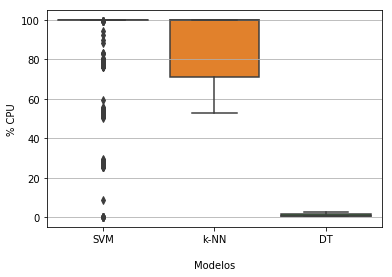

In [73]:
g = sns.boxplot(data=EVOL_PERC_CPU.iloc[:,1:4])
g.set(ylabel='% CPU', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [76]:
EVOL_RAM_PERC = pd.read_csv("EVOL_RAM_PERC.csv")

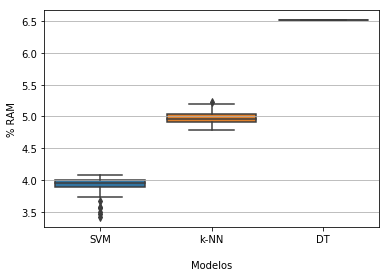

In [77]:
g = sns.boxplot(data=EVOL_RAM_PERC .iloc[:,0:3])
g.set(ylabel='% RAM', xlabel='\nModelos')
g.yaxis.grid(True)

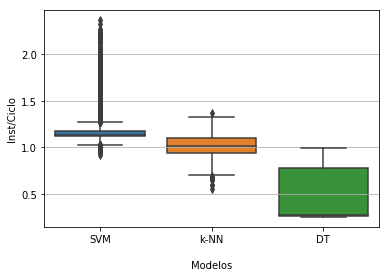

In [80]:
g = sns.boxplot(data=EVOL_CYCLES.iloc[:,0:3])
g.set(ylabel='Inst/Ciclo', xlabel='\nModelos')
#g.set(ylim=(3, 4))
g.yaxis.grid(True)

In [81]:
from matplotlib import pyplot as plt
tiempos = list(2.666,)
plt.